In [1]:
import torch
from torch import nn
from  torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import  ToTensor
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#=nb

In [2]:
train_data = datasets.CIFAR10(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.CIFAR10(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 170498071/170498071 [00:03<00:00, 49324600.96it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
train_img , train_lbl = torch.tensor(train_data.data), torch.tensor(train_data.targets)
test_img, test_lbl = torch.tensor(train_data.data), torch.tensor(train_data.targets)

In [4]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
class nearst_neighbor:
  def train(self, train_data):
    self.image = train_data.data
    self.label = train_data.targets
    self.classes = train_data.classes
  def pridict(self, X):
    predictions = []
    for img in self.image:
      distance =  torch.sqrt(torch.sum(torch.square(torch.tensor(img) - torch.tensor(X))))
      predictions.append(distance)
    predicted = torch.argmin(torch.tensor(predictions))
    classes = self.classes[predicted]
    plt.title(classes)
    plt.imshow(X)

In [6]:
divice = (
    "cuda"
    if torch.cuda.is_available()
    else "mvr"
    if torch.mvr.is_available()
    else "cpu"
)
print(f'using {divice}')

using cuda


In [9]:
classifier = nearst_neighbor()
classifier.train(train_data)

<ipython-input-5-1943bad49741>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  distance =  torch.sqrt(torch.sum(torch.square(torch.tensor(img) - torch.tensor(X))))


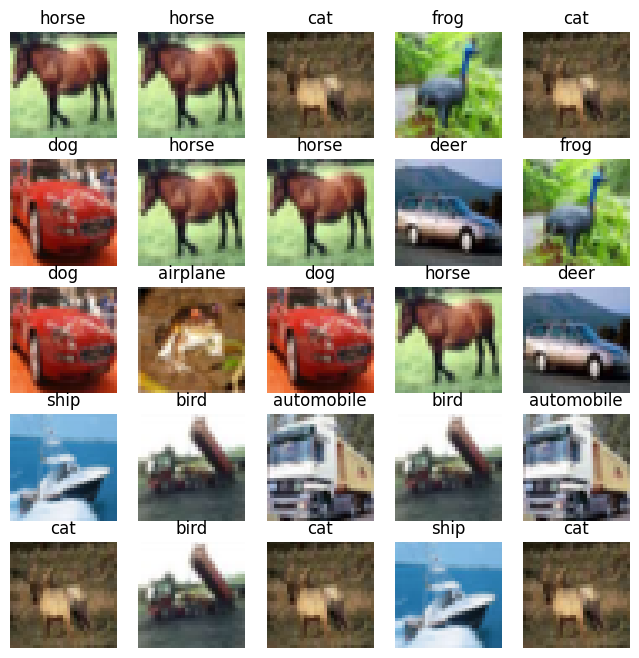

In [17]:
figure = plt.figure(figsize = (8,8))
col = 5
rows = 5
for i in range(1, col * rows + 1):
    value = torch.randint(0, 10, (1,)).item()
    img = test_img[value]
    figure.add_subplot(rows, col, i)
    plt.axis("off")
    classifier.pridict(img)
